In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [200]:
def mymod():
    
    model = Sequential()
    
    model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape=(64,64,3)))
    model.add(Convolution2D(32,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Convolution2D(64,(3,3),activation = 'relu'))
    model.add(Convolution2D(64,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Convolution2D(128,(3,3),activation = 'relu',))
    model.add(Convolution2D(128,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128,activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7,activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
    

In [201]:
mod = mymod()
print(mod.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 11, 11, 128)     

In [202]:
trgen = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.3,
                          height_shift_range=0.3,
                          shear_range = 0.3,
                          zoom_range = 0.3,
                          horizontal_flip = True,
                          rotation_range = 10)

tegen = ImageDataGenerator(rescale = 1./255)

In [203]:
x_train = trgen.flow_from_directory('C:/Users/Prathmesh/Documents/Rsip_dataset/Training_Set',
                                   target_size = (64,64),
                                   batch_size = 32,
                                   class_mode = 'categorical')

Found 490 images belonging to 7 classes.


In [204]:
x_test = tegen.flow_from_directory('C:/Users/Prathmesh/Documents/Rsip_dataset/Testing_Set',
                                  target_size = (64,64),
                                  batch_size = 32,
                                  class_mode = 'categorical')

Found 210 images belonging to 7 classes.


In [205]:
x_train.class_indices

{'Conglomerate': 0,
 'Diorate': 1,
 'Fire opal': 2,
 'Genisis': 3,
 'Limestone': 4,
 'Obsidian': 5,
 'Slate': 6}

In [206]:
history = mod.fit(x_train,
                 steps_per_epoch = 120,
                 epochs = 50,
                 validation_data = x_test,
                 validation_steps = 20)

Epoch 1/50
120/120 [==============================] - 25s 209ms/step - loss: 1.7002 - accuracy: 0.2647 - val_loss: 1.4722 - val_accuracy: 0.3905
Epoch 2/50
120/120 [==============================] - 15s 121ms/step - loss: 1.5647 - accuracy: 0.3264 - val_loss: 1.2029 - val_accuracy: 0.4933
Epoch 3/50
120/120 [==============================] - 14s 118ms/step - loss: 1.3833 - accuracy: 0.4506 - val_loss: 1.2392 - val_accuracy: 0.4916
Epoch 4/50
120/120 [==============================] - 14s 118ms/step - loss: 1.1384 - accuracy: 0.5499 - val_loss: 1.6351 - val_accuracy: 0.5067
Epoch 5/50
120/120 [==============================] - 14s 118ms/step - loss: 1.0627 - accuracy: 0.5882 - val_loss: 2.3085 - val_accuracy: 0.5418
Epoch 6/50
120/120 [==============================] - 14s 120ms/step - loss: 0.9876 - accuracy: 0.6118 - val_loss: 1.6826 - val_accuracy: 0.5702
Epoch 7/50
120/120 [==============================] - 14s 117ms/step - loss: 0.9162 - accuracy: 0.6375 - val_loss: 2.1580 - val_ac

In [207]:
score = mod.evaluate(x_test)

7/7 [==============================] - 2s 310ms/step


In [208]:
print('loss',score[0])
print('accuracy',score[1])

loss 0.9496533870697021
accuracy 0.7095237970352173


Text(0, 0.5, 'loss')

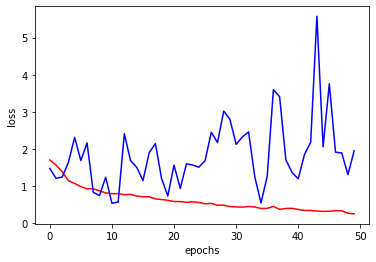

In [209]:
plt.figure(0)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

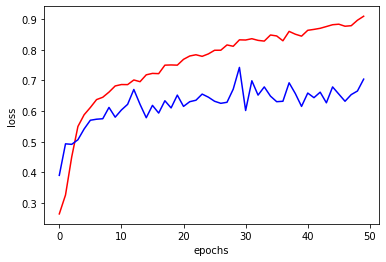

In [210]:
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [211]:
mod.save('trained.h5')